                                      ~ D22012 - BHARATH BOMMEESHWAR K ~ 

### <U> Problem Statement 
<font color= green> You are hired by a company Gem Stones co ltd, which is a cubic zirconia 
manufacturer. You are provided with the dataset containing the prices and other 
attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond 
alternative with many of the same qualities as a diamond). The company is earning 
different profits on different prize slots. You have to help the company in predicting 
the price for the stone on the bases of the details given in the dataset so it can 
distinguish between higher profitable stones and lower profitable stones so as to 
have better profit share. Also, provide them with the best 5 attributes that are most 
important.

### <U>Objective

To build a optimal Machine learning model for predicting the price of the gemstone. Thereby it would help to improve the business profitability.

### <U>Frame work
   - Data acquistion
   - Exploratory Data Analysis - Univariate and bivariate
   - Data pre-processing 
   - Building machine learning model
   - Model evaluation 
   - Model testing
   - Conclusion and Recommendations

## 1. DATA ACQUISITION

####  IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.impute import KNNImputer

#### READING THE FILE

In [2]:
#Importing the cubic_zirconia dataset and making copy of original dataset. Removed the column index
data=pd.read_csv('Gem_prices.csv')

In [3]:
#dropping serial number column
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
#making copy of original data set
gem = data.copy()

#### INFORMATION ABOUT THE DATASET

In [5]:
gem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Carat         | Carat weight of the cubic zirconia    |                                                                       
| Cut           | Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good,VeryGood,Premium,Ideal                                                                                                        |
| Color         | Colour of the cubic zirconia.With D being the best and J the worst                                          |
| Clarity      | cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = 1. flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3                                     |                                                                                  
| X        | Length of the cubic zirconia in mm                                                                               |
| Y    | Width of the cubic zirconia in mm                                                                                    |
| Z          | Height of the cubic zirconia in mm                                                                             | 
| Depth     |The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter     |  
| Table     | The Width of the cubic zirconias Table expressed as a Percentage of its Average Diameter                        |  
| Price   | the Price of the cubic zirconia                                                                                   | 
                                                           


### <u>The dataset contains totally 10 variables and 26967 observations
  - 7 Numerical variables - The dataset contains 6 float datatype variables and 1 integer datatype variable  
  - 3 Categorical variables - The dataset contains 3 object datatype variables  
  - 1 target variable(numerical)  

## 2.EXPLORATORY DATA ANALYSIS

In [6]:
# Identifying the presence of null values
gem.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
# Checking for any duplicate entries
duplicates=gem.duplicated()
print("Duplicates count:",duplicates.sum())
gem[duplicates]

Duplicates count: 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [8]:
# Dropping the duplicates
gem.drop_duplicates(inplace=True)

duplicates=gem.duplicated()
print("Duplicates count:",duplicates.sum())
gem[duplicates]

Duplicates count: 0


,carat,cut,color,clarity,depth,table,x,y,z,price


##### No duplicates are found and if any present they should be removed.

In [9]:
# Descriptive statistics of all the 7 numerical variables
gem.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#####  From the descriptive statistics, its clearly visible that mean for most of the variables differ from the median i.e. skewed data  and 50% of the gems price fall below 2375 INR  

In [10]:
# Descriptive statistics of all the 3 categorical variables
gem.describe(include=object)

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


# Univariate analysis

#### <I> NUMERICAL VARIABLES

Text(0.5, 1.0, 'Box Plot of price Distribution')

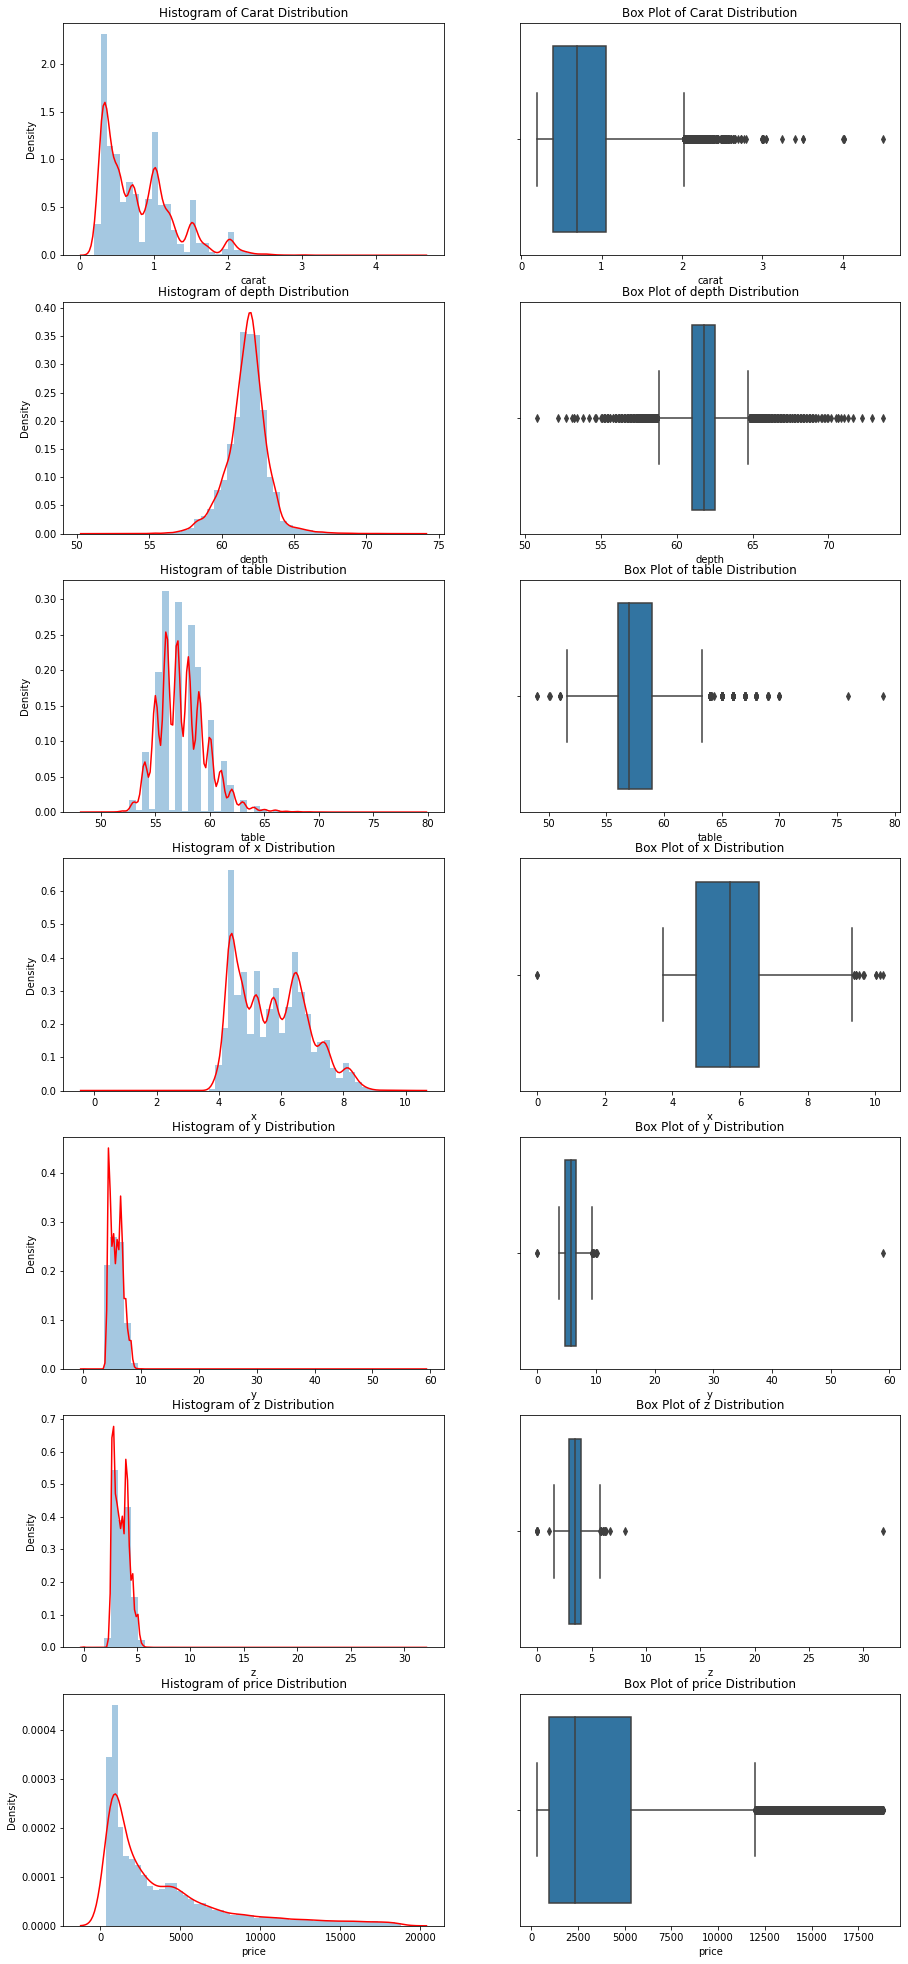

In [11]:
fig,axes=plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,35)

# Carat

carat=sns.distplot(gem['carat'], ax=axes[0][0], kde_kws={"color": "r"})
carat.set_title('Histogram of Carat Distribution')
carat=sns.boxplot(gem['carat'], ax=axes[0][1])
carat.set_title('Box Plot of Carat Distribution')

# depth

depth=sns.distplot(gem['depth'], ax=axes[1][0], kde_kws={"color": "r"})
depth.set_title('Histogram of depth Distribution')
depth=sns.boxplot(gem['depth'], ax=axes[1][1])
depth.set_title('Box Plot of depth Distribution')

# table

table=sns.distplot(gem['table'], ax=axes[2][0], kde_kws={"color": "r"})
table.set_title('Histogram of table Distribution')
table=sns.boxplot(gem['table'], ax=axes[2][1])
table.set_title('Box Plot of table Distribution')

# x

x=sns.distplot(gem['x'], ax=axes[3][0], kde_kws={"color": "r"})
x.set_title('Histogram of x Distribution')
x=sns.boxplot(gem['x'], ax=axes[3][1])
x.set_title('Box Plot of x Distribution')

# y

y=sns.distplot(gem['y'], ax=axes[4][0], kde_kws={"color": "r"})
y.set_title('Histogram of y Distribution')
y=sns.boxplot(gem['y'], ax=axes[4][1])
y.set_title('Box Plot of y Distribution')

# z

z=sns.distplot(gem['z'], ax=axes[5][0], kde_kws={"color": "r"})
z.set_title('Histogram of z Distribution')
z=sns.boxplot(gem['z'], ax=axes[5][1])
z.set_title('Box Plot of z Distribution')

# price

price=sns.distplot(gem['price'], ax=axes[6][0], kde_kws={"color": "r"})
price.set_title('Histogram of price Distribution')
price=sns.boxplot(gem['price'], ax=axes[6][1])
price.set_title('Box Plot of price Distribution')

#### INSIGHTS :
* <b><i>Under our analysis among all the variables, variable 'depth' has got the normally distributed curve, other variables    have got the skewed distribution  
* <b><i>Outliers are seen in almost all the variables since they might be influential they are retained for now.After seeing the performance of the model they will be dealt upon later.   

### <I> CATEGORICAL VARIABLES

#### Variable - "Cut"

In [12]:
#Frequency plots to see the counts
cut_table=pd.crosstab(gem.cut,columns="Frequency")
cut_table

col_0,Frequency
cut,
Fair,780
Good,2435
Ideal,10805
Premium,6886
Very Good,6027


In [13]:
#In percentage total
cut_coltotal=cut_table.sum(axis=0)
cut_table.div(cut_coltotal,axis=1)*100

col_0,Frequency
cut,
Fair,2.896075
Good,9.040953
Ideal,40.118071
Premium,25.567148
Very Good,22.377752


<AxesSubplot:xlabel='cut', ylabel='count'>

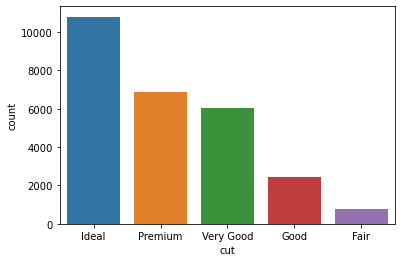

In [14]:
sns.countplot(gem['cut'],order=gem['cut'].value_counts().index)

#### Variable - "Color"

In [15]:
color_table=pd.crosstab(gem.color,columns="Frequency")
color_table

col_0,Frequency
color,
D,3341
E,4916
F,4723
G,5653
H,4095
I,2765
J,1440


In [16]:
color_coltotal=color_table.sum(axis=0)
color_table.div(color_coltotal,axis=1)*100

col_0,Frequency
color,
D,12.404856
E,18.252701
F,17.536108
G,20.989121
H,15.204396
I,10.266216
J,5.346601


<AxesSubplot:xlabel='color', ylabel='count'>

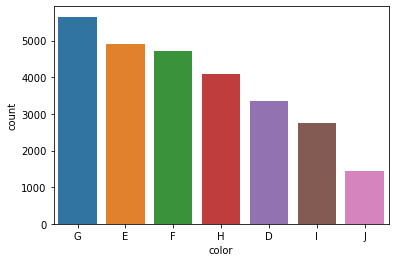

In [17]:
sns.countplot(gem['color'],order=gem['color'].value_counts().index)

#### Variable - "Clarity"

In [18]:
clarity_table=pd.crosstab(gem.clarity,columns="Frequency")
clarity_table

col_0,Frequency
clarity,
I1,364
IF,891
SI1,6565
SI2,4564
VS1,4087
VS2,6093
VVS1,1839
VVS2,2530


In [19]:
clarity_coltotal=clarity_table.sum(axis=0)
clarity_table.div(clarity_coltotal,axis=1)*100

col_0,Frequency
clarity,
I1,1.351502
IF,3.308209
SI1,24.375302
SI2,16.945754
VS1,15.174693
VS2,22.622805
VVS1,6.828055
VVS2,9.393681


<AxesSubplot:xlabel='clarity', ylabel='count'>

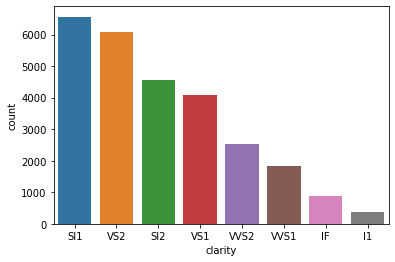

In [20]:
sns.countplot(gem['clarity'],order = gem['clarity'].value_counts().index)

#### INSIGHTS:
* <b><i> Under our analysis, nearly 25 % of the gems have SI1 clarity whereas only 1 % of the gems have I1 clarity
* <b><i> Under our analysis, 40% of the gems have ideal cuts whereas only 3 % of the gems have fair cuts 
* <b><i> Under our analysis, around 21 % of the gems have color 'G' whereas around 5 % of the gems have color 'J'

# Bivariate analysis

#### <I> NUMERICAL VARIABLES

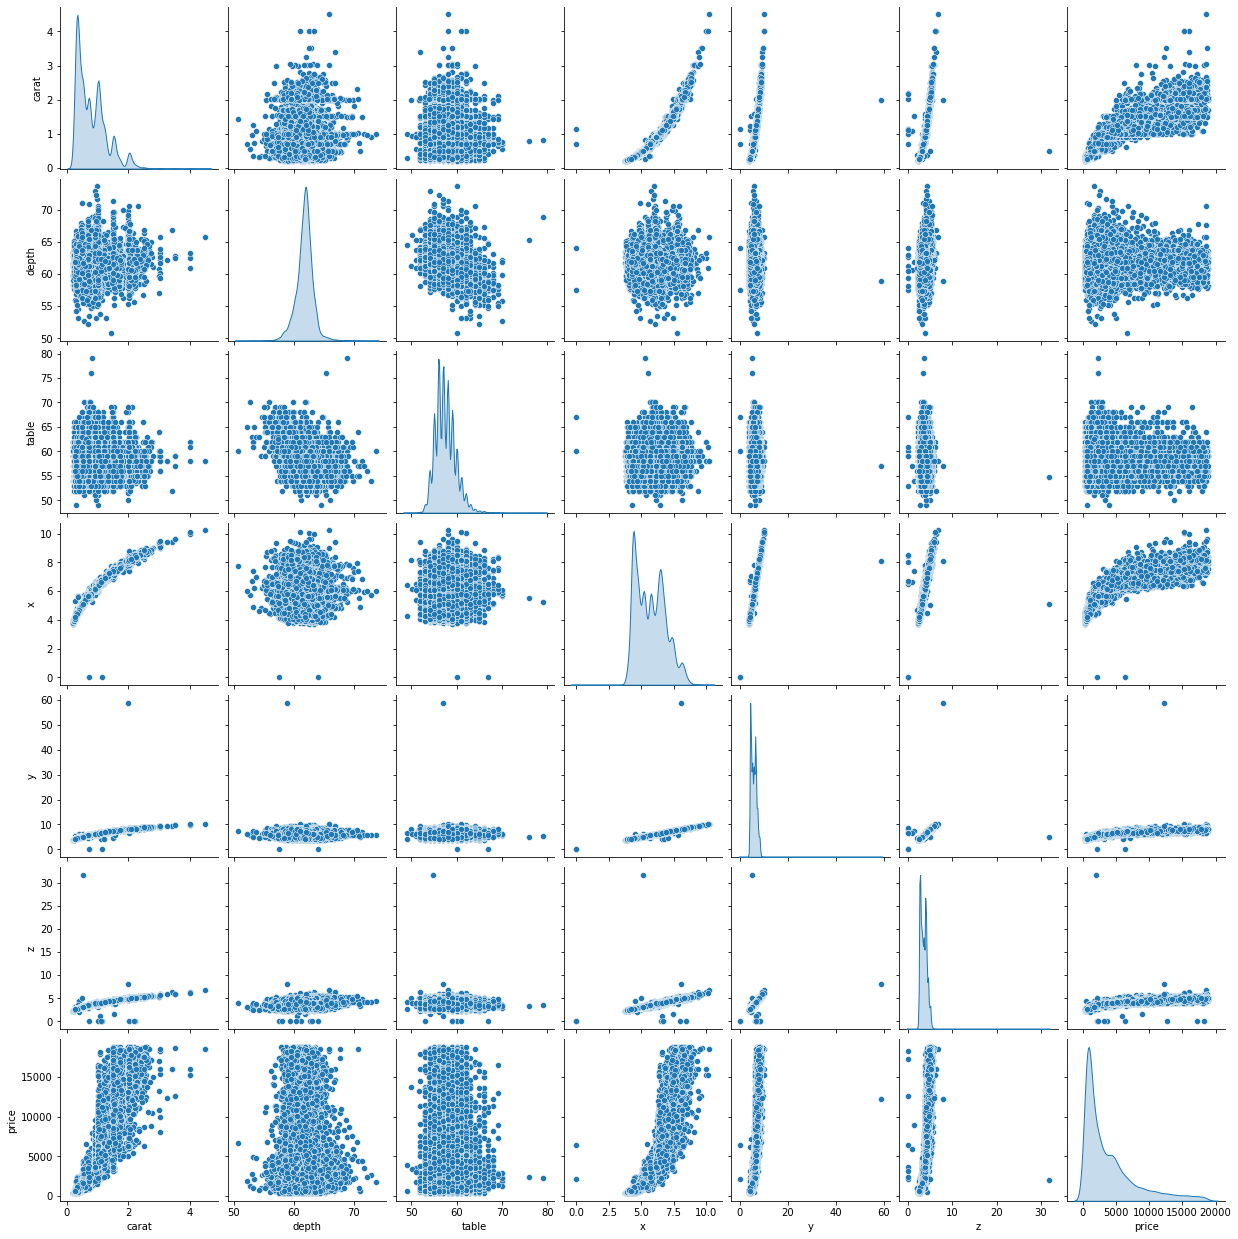

In [21]:
# Pairplot to see the linear relationship between variables
sns.pairplot(gem,diag_kind='kde')

* <b><i>Under our analysis, from the pairplot it can be clearly seen that the price of gems lineraly increasing with the increase in carat weight  
* <b><i>Also the dimensions of gems (x-length,y-breadth,z-height) have also got the linear relationship on the price. As the size of the gem varies, the price is also getting affected 

In [22]:
# Correlation between the numerical variables
gem.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


In [23]:
#Check Correlation with Price
gem.corr().price

carat    0.922409
depth   -0.002895
table    0.126844
x        0.886554
y        0.856441
z        0.850682
price    1.000000
Name: price, dtype: float64

#### INSIGHTS:
* <b><I> Variable carat has got the highest positive correlation with x, y, z and price
* <b><I> Variable price has got the second highest positive correlation with carat, x, y and z
* <b><I> Variables depth and table have got the least positive correlation / negative correlation with other variables
* <b><I> Especially, variable depth is negatively correlated with almost all the variables 

### <I> CATEGORICAL VARIABLES

In [24]:
gem.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

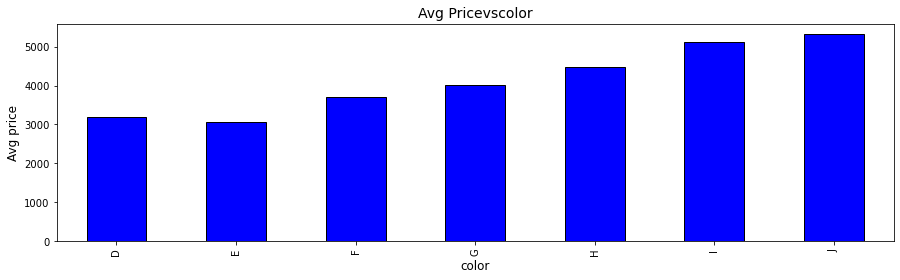

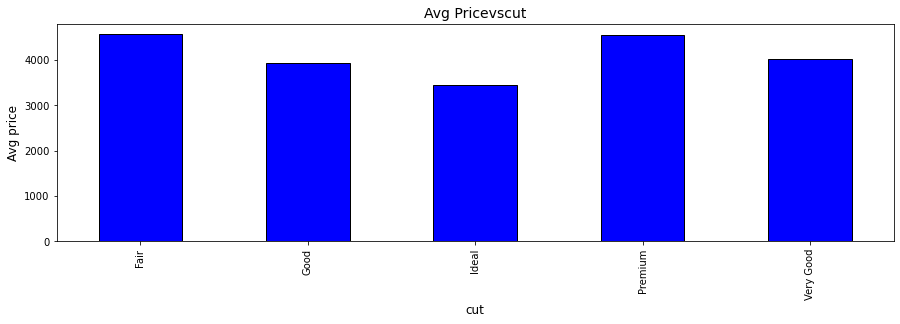

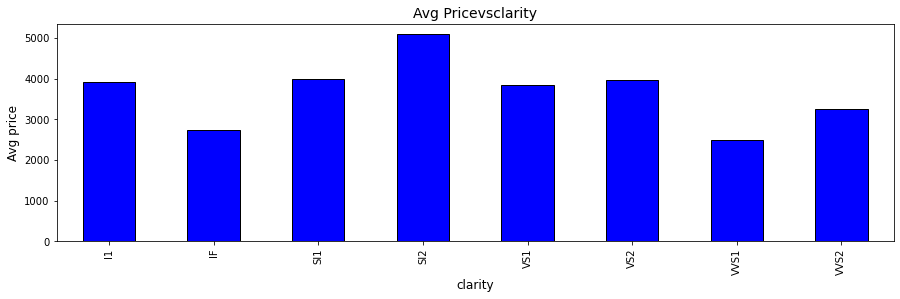

In [25]:

# Groupby aggregate using barplot 

cat_disc = ['color', 'cut', 'clarity']

for i in cat_disc:    
    gem.groupby([i])['price'].mean().plot(kind='bar',figsize=(15,4),color="blue",fontsize=10,edgecolor="black")
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Avg price',fontsize=12)
    plt.title('Avg Price'+ 'vs'+i ,fontsize=14)
    plt.show()

#### INSIGHTS:
* <b><I> Color of the stone shows correlation with price("D" least priced to "J" high priced)  
* <b><I> The price doesnot differ much with respect to every individual cuts.  
* <b><I> Average Price of S12 clarity is higher compared to other clarity stones.  


## 3.DATA PRE-PROCESSING

#### <I> NULL VALUE IMPUTATION

In [26]:
#Rectifying the null values for input the data in model for training
gem.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

* <b> Here the variable 'depth' has got 697  (around 2.5 % of the data- its meaningless to drop) null values which needs to be imputed with the mean since the variable is normally distributed 

In [27]:
# Assigning mean values to all the nulls of variable depth(continuous)
depth_mean=gem['depth'].mean()
gem['depth']=gem['depth'].fillna(value=depth_mean)

In [28]:
#KNN imputer can also be used but due to time complexity we go with mean imputation which is appropriate in this case
#imputer = KNNImputer(n_neighbors = 10)
#imputer.fit_transform(df)

In [29]:
# After imputation, checking for any null values
gem.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### <I> CHECKING FOR ZERO VALUES IN THE DATASET

In [30]:
for variable in gem.columns: 
    print("\nVariable: ",variable)
    print(gem.loc[gem[variable]==0])


Variable:  carat
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  cut
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  color
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  clarity
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  depth
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  table
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

Variable:  x
       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381

Variable:  y
       carat   cut color clarity  depth  table    x    y    z  price
5821    0.71  Good     F

* <b> Variables x, y and z which are dimensions have got few 0 value records. Since zero values are meaningless in dimension of an item they need to be imputed 
* <b> 0's are imputed with median values since x, y and z data distribution is skewed

In [31]:
#Imputing with median
gem['x']=gem['x'].replace(0,gem['x'].median())
gem['y']=gem['y'].replace(0,gem['y'].median())
gem['z']=gem['z'].replace(0,gem['z'].median())

In [32]:
# Rechecking for zero values after imputation
for varaible in gem.columns:
    print("\n Variable:",variable)
    print(gem.loc[gem[variable]==0])


 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

 Variable: price
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
In

In [33]:
#Making of a copy of dataset before encoding
gem1 = gem.copy()

#### <I> ENCODING CATEGORICAL VARIABLES
Since Algorithms cannot deal with strings ther are converted to numerics    

In [34]:
gem1=pd.get_dummies(gem1,columns=['cut', 'color', 'clarity'],drop_first=True)
gem1             # cut_fair,color_D,clarity_I1 are the references,so we drop those in dummies

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,1,0,...,1,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
gem2 = gem1.copy()
gem2

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,0,1,0,...,1,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### <I>SPLITTING DATASET INTO TRAIN VALIDATION SPLIT

In [36]:
X=gem1.drop('price',axis=1)
y=gem1.pop('price')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Splitting into Train Test 70:30 ratio
#The test data kept under complete darkness for final testing of the model.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
#Whole data is splitted into Train and Test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18853, 23)
(18853,)
(8080, 23)
(8080,)


In [40]:
#From the train data now we can split the validation data which can be used to validate the trained model over this data.
#Here we are again making 70:30 split,which is 30% of 70% which is 0.43
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.43,random_state=42) 

In [41]:
#Train data is splitted into Train and validation
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(10746, 23)
(10746,)
(8107, 23)
(8107,)


## 4.BUILDING MACHINE LEARNING MODEL & EVALUATING

### NOTE:
*<font color= green> <b><i>From the EDA we could see the dependent variable has linear relationship with most of the independent variables so 
    we choose to use Linear Regression Model ,in addition we will try with other models such as KNN and Decision Tree

### <i> <u>TRIAL 1
* <b> <i> Include all variables

##### <U>MODEL TRAINING

In [42]:
#Fitting the linear model to the train dataset for the model to get trained
reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

In [43]:
#Point of intercept of the Regression line over yaxis
reg1.intercept_

-957.1096002624608

In [44]:
#the regressors of each predictor variable  which determines the prediction
reg1.coef_

array([11613.54349152,   -17.30476626,   -13.48082367,  -714.89392914,
          36.94274132,  -779.80935947,   543.51494624,   888.51608385,
         741.64409769,   706.96715417,  -194.20796805,  -286.24452749,
        -502.73636795,  -982.47364358, -1552.24465618, -2419.06570506,
        5246.47996213,  3658.00314544,  2639.27924655,  4590.28678243,
        4276.85143359,  5017.1566809 ,  4925.20476647])

In [45]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
T1_R2 = reg1.score(X_train,y_train)
T1_R2

0.9218502152100582

##### <U> MODEL VALIDATION

In [46]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [47]:
#Using validation data to check the model performance over prediction
reg_pred1 = reg1.predict(X_valid)
reg_pred1

array([12930.32819959,  2868.08577613,  5864.86978343, ...,
         174.35811472,   496.26877471,  2348.00293102])

In [48]:
#MAE (mean absolute error)
T1_MAE = np.mean(np.abs(y_valid-reg_pred1))
T1_MAE

736.0084838886662

In [49]:
#MSE
T1_MSE = np.mean((y_valid -reg_pred1)**2)
T1_MSE

1265686.5170108841

In [50]:
#RMSE
T1_RMSE = np.sqrt(np.mean((y_valid-reg_pred1)**2))
T1_RMSE

1125.0273405615012

In [51]:
#MAPE
T1_MAPE = np.mean(np.abs(y_valid-reg_pred1)/y_valid)*100
T1_MAPE

40.14910743581456

### <U><I>MODEL TESTING

In [52]:
#Testing with Trial1 model

In [53]:
#Using test data to check the model performance over prediction
reg_pred1 = reg1.predict(X_test)
reg_pred1

array([ 942.03245638,  -74.57815665, -813.28737521, ..., -356.12559815,
       6154.01471457,  434.75422675])

In [54]:
X_test

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
3916,0.41,61.8,59.0,4.76,4.72,2.93,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10439,0.31,62.2,60.0,4.30,4.32,2.68,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
24237,0.41,61.7,55.0,4.79,4.81,2.96,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
9590,0.27,58.6,61.0,4.27,4.30,2.51,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7451,1.24,62.4,59.0,6.82,6.86,4.27,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,0.60,63.7,56.0,5.34,5.36,3.41,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10346,0.45,57.6,62.5,5.05,5.09,2.91,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11273,0.43,61.8,57.0,4.88,4.83,3.00,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
21889,1.01,62.5,58.0,6.43,6.40,4.01,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
#MAE (mean absolute error)
T1_MAE_T = np.mean(np.abs(y_test-reg_pred1))
T1_MAE_T

747.3224221790449

In [56]:
#MSE
T1_MSE_T = np.mean((y_test -reg_pred1)**2)
T1_MSE_T

1354560.03095797

In [57]:
#RMSE
T1_RMSE_T = np.sqrt(np.mean((y_test-reg_pred1)**2))
T1_RMSE_T

1163.855674453654

In [58]:
#MAPE
T1_MAPE_T = np.mean(np.abs(y_test-reg_pred1)/y_test)*100
T1_MAPE_T

40.39298178935069

### <i> <u>TRIAL 2
* <b> <i> Log transformation of Target variable

In [59]:
#Log transformation bring down the scale/magnitude of the values.This is used when the range of values are high
y_train_tranf = y_train.copy()

In [60]:
#taking log of y
log_y = np.log(y_train_tranf)

In [61]:
log_y

9526     7.693026
8391     9.549096
16806    8.621733
14842    7.920447
22637    8.963160
           ...   
14456    9.562053
10898    7.732808
506      8.748305
21069    6.388561
24529    7.945201
Name: price, Length: 10746, dtype: float64

##### <U>MODEL TRAINING

In [62]:
#Fitting the linear model to the train dataset for the model to get trained
reg2 = LinearRegression()
reg2.fit(X_train,log_y)

LinearRegression()

In [63]:
#Point of intercept of the Regression line over yaxis
reg2.intercept_

-3.1715146523950644

In [64]:
#the regressors of each predictor variable  which determines the prediction
reg2.coef_

array([-1.02077834,  0.04039962,  0.00990557,  1.1951491 , -0.01649522,
        0.36037125,  0.08931404,  0.15740412,  0.11163241,  0.12404381,
       -0.06047492, -0.09642612, -0.16677998, -0.25751877, -0.37708292,
       -0.50486098,  1.12832872,  0.61220496,  0.43555072,  0.82702072,
        0.75636803,  1.02849054,  0.9593794 ])

In [65]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
T2_R2 = reg2.score(X_train,log_y)
T2_R2

0.9816968965028442

##### <U> MODEL VALIDATION

In [66]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [67]:
#Using validation data to check the model performance over prediction
reg_pred2 = reg2.predict(X_valid)
reg_pred2

array([9.20660815, 7.94703738, 8.54850786, ..., 6.33155659, 6.39967365,
       7.55920992])

In [68]:
#taking antilog before measuring the error metrics
np.exp(reg_pred2)

array([9962.7472949 , 2827.18665698, 5159.05063868, ...,  562.03076705,
        601.64865915, 1918.32927494])

In [69]:
#MAE (mean absolute error)
T2_MAE = np.mean(np.abs(y_valid-np.exp(reg_pred2)))
T2_MAE

435.6079676128975

In [70]:
#MSE
T2_MSE = np.mean((y_valid -np.exp(reg_pred2))**2)
T2_MSE

745571.5558161311

In [71]:
#RMSE
T2_RMSE = np.sqrt(np.mean((y_valid-np.exp(reg_pred2))**2))
T2_RMSE

863.4648549976606

In [72]:
#MAPE
T2_MAPE = np.mean(np.abs(y_valid-np.exp(reg_pred2))/y_valid)*100
T2_MAPE

10.587780746160647

##### <U> MODEL TESTING

In [73]:
#Using validation data to check the model performance over prediction
reg_pred2 = reg2.predict(X_test)
reg_pred2

array([6.859252  , 6.4283629 , 6.56846151, ..., 6.73539125, 8.692901  ,
       6.53337227])

In [74]:
#taking antilog before measuring the error metrics
np.exp(reg_pred2)

array([ 952.65421339,  619.1594937 ,  712.27317666, ...,  841.67272146,
       5960.44841789,  687.71346328])

In [75]:
#MAE (mean absolute error)
T2_MAE_T = np.mean(np.abs(y_test-np.exp(reg_pred2)))
T2_MAE_T

6634.7369798137415

In [76]:
#MSE
T2_MSE_T = np.mean((y_test -np.exp(reg_pred2))**2)
T2_MSE_T

310177813808.39655

In [77]:
#RMSE
T2_RMSE_T = np.sqrt(np.mean((y_test-np.exp(reg_pred2))**2))
T2_RMSE_T

556936.094905328

In [78]:
#MAPE
T2_MAPE_T = np.mean(np.abs(y_test-np.exp(reg_pred2))/y_test)*100
T2_MAPE_T

325.138725698602

### <i> <u>TRIAL 3
 <b> <i>Standardize the Numerical variable: (Z-score)
 * Standardizing the features makes the mean of the variable to 0 and variance to 1 ,by doing so the model could give equal weightage to all variable. Whereas normalization bring the values between 0 and 1(variance is not altered but the mean is changed to 0).

In [79]:
# Seperating the continuous and categorical features
continuous,category=[],[]
for cols in gem2:
    if len(gem2[cols].unique())>5:
        continuous.append(cols)        
    else:
        category.append(cols)
continuous        

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [80]:
# Using standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gem2[continuous]= scaler.fit_transform(gem2[continuous])

In [81]:
gem2

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043547,0.254491,0.243737,-1.296116,-1.240176,-1.225062,-0.854828,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980684,-0.678196,0.243737,-1.162932,-1.094124,-1.169302,-0.734256,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213713,0.326236,1.139749,0.275452,0.332032,0.336211,0.584584,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792095,-0.104235,-0.652274,-0.807776,-0.802020,-0.806864,-0.709892,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022593,-0.965177,0.691743,-1.225085,-1.119898,-1.239002,-0.785219,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.653754,0.397981,0.243737,0.781550,0.675685,0.768349,0.365564,0,0,1,...,0,0,0,0,1,0,0,0,0,0
26963,-0.980684,0.111000,-1.100279,-1.145174,-1.128489,-1.113543,-0.701937,0,1,0,...,1,0,0,1,0,0,0,0,0,0
26964,-0.603506,-0.032490,0.243737,-0.541408,-0.501324,-0.514126,-0.567194,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26965,-1.106410,0.039255,-0.652274,-1.367147,-1.317498,-1.308702,-0.809334,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### <I>SPLITTING DATASET INTO TRAIN VALIDATION SPLIT ON STANDARDIZED DATA

In [82]:
X=gem2.drop('price',axis=1)
y=gem2.pop('price')

In [83]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
#Whole data is splitted into Train and Test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18853, 23)
(18853,)
(8080, 23)
(8080,)


In [85]:
#Train Validation split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.43,random_state=42) 

In [86]:
#Train data is splitted into Train and validation(70:30)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(10746, 23)
(10746,)
(8107, 23)
(8107,)


##### <U>MODEL TRAINING

In [87]:
#Fitting the linear model to the train dataset for the model to get trained
reg3 = LinearRegression()
reg3.fit(X_train,y_train)

LinearRegression()

In [88]:
#Point of intercept of the Regression line over yaxis
reg3.intercept_

-1.022731942916867

In [89]:
#the regressors of each predictor variable  which determines the prediction
reg3.coef_

array([ 1.37783534, -0.00599625, -0.00748065, -0.20016503,  0.01068997,
       -0.1390702 ,  0.13511946,  0.22088779,  0.18437497,  0.17575417,
       -0.04828069, -0.07116126, -0.12498178, -0.24424592, -0.38589272,
       -0.60138705,  1.30429079,  0.90939065,  0.65613281,  1.14115918,
        1.06323821,  1.24728033,  1.22442081])

In [90]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
T3_R2 = reg3.score(X_train,y_train)
T3_R2

0.9218502152100582

##### <U> MODEL VALIDATION

In [91]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [92]:
#Using validation data to check the model performance over prediction
reg_pred3 = reg3.predict(X_valid)
reg_pred3

array([ 2.23563781, -0.26586611,  0.47914347, ..., -0.93553495,
       -0.85550699, -0.39516027])

In [93]:
#MAE (mean absolute error)
T3_MAE = np.mean(np.abs(y_valid-reg_pred3))
T3_MAE

0.1829739362386376

In [94]:
#MSE
T3_MSE = np.mean((y_valid -reg_pred3)**2)
T3_MSE

0.07822381175304365

In [95]:
#RMSE
T3_RMSE =np.sqrt(np.mean((y_valid-reg_pred3)**2))
T3_RMSE

0.27968520116917817

In [96]:
#MAPE (since we have standarized all the features,the mape value droped to negative which is uninterpretable)
T3_MAPE = np.mean(np.abs(y_valid-reg_pred3)/y_valid)*100
T3_MAPE

-29.07355065960204

##### <U> MODEL TESTING

In [97]:
#Using validation data to check the model performance over prediction
reg_pred3 = reg3.predict(X_test)
reg_pred3

array([-0.74468879, -0.99742126, -1.18106661, ..., -1.06741481,
        0.55102577, -0.87079969])

In [98]:
#MAE (mean absolute error)
T3_MAE_T = np.mean(np.abs(y_test-reg_pred3))
T3_MAE_T

0.18578661553332979

In [99]:
#MSE
T3_MSE_T = np.mean((y_test -reg_pred3)**2)
T3_MSE_T

0.08371650281942826

In [100]:
#RMSE
T3_RMSE_T =np.sqrt(np.mean((y_test-reg_pred3)**2))
T3_RMSE_T

0.28933804246836997

In [101]:
#MAPE (since we have standarized all the features,the mape value droped to negative which is uninterpretable)
T3_MAPE_T = np.mean(np.abs(y_test-reg_pred3)/y_test)*100
T3_MAPE_T

-15.85677530173529

### <i> <u>TRIAL 4
 <b> <i>Measure multicollinearity between Independent Variables
 * When two variables are highly colinear then the coefficient's standard error between them will be high and it will affect the p value which will result in dropping an influential variable,however this will not affect the prediction accuracy.

In [102]:
X_train.shape

(10746, 23)

In [103]:
# Measure multiple correlation between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, ix) for ix in range (X_train.shape[1])]

### VIF(Variance Inflation Factor)

In [104]:
i = 0
for column in X_train.columns:
    if i < 30:
        print(column, ":", vif[i])
        i=i+1

carat : 25.688430330815336
depth : 4.357694097387769
table : 1.7066202027114314
x : 191.40136389411242
y : 9.210970235055216
z : 214.07585473423785
cut_Good : 3.5918173041053127
cut_Ideal : 14.503372908536482
cut_Premium : 8.824488813424562
cut_Very Good : 7.662719670177667
color_E : 2.4253065487137215
color_F : 2.3566090434322273
color_G : 2.7065131969033542
color_H : 2.236670266875659
color_I : 1.8490167983444987
color_J : 1.4810550586074882
clarity_IF : 2.289578343829282
clarity_SI1 : 8.733968886292928
clarity_SI2 : 6.337677163099932
clarity_VS1 : 6.410267422847127
clarity_VS2 : 8.663424971950173
clarity_VVS1 : 3.505862858799554
clarity_VVS2 : 4.306794096643457


* <b>We can see variables which has high VIF such as Dimensions(x,y,z) and Carat.These variables are more
  important for the prediction,they have good explanatory power over the targets(correlation from EDA shows that).
  Therefore we will move to the next variable which is CUT and drop it.

In [105]:
#Dropping all related "cut" dummy variables
X_train = X_train.drop(["cut_Good","cut_Ideal","cut_Premium","cut_Very Good"],axis=1)

In [106]:
vif = [variance_inflation_factor(X_train.values, ix) for ix in range (X_train.shape[1])]

In [107]:
#VIF check again
i = 0
for column in X_train.columns:
    if i < 30:
        print(column, ":", vif[i])
        i=i+1

carat : 25.619902174789623
depth : 4.194692067875249
table : 1.1549003407320924
x : 188.7020008565162
y : 9.196143146841962
z : 211.33719657705703
color_E : 2.3902711607491605
color_F : 2.3361544825698917
color_G : 2.667798925570674
color_H : 2.2091065201417677
color_I : 1.8311202160393376
color_J : 1.4761084485414355
clarity_IF : 1.355813449186244
clarity_SI1 : 2.4805913609194428
clarity_SI2 : 2.0590431431729606
clarity_VS1 : 2.2051489378459452
clarity_VS2 : 2.530985297651791
clarity_VVS1 : 1.6373627372252617
clarity_VVS2 : 1.7414861608458259


*<b> We can see all the VIF of other variables have literally dropped very much which shows that multicollinearity has reduced a lot between variables.However as we said before it will not affect the prediction much.

##### <U>MODEL TRAINING

In [108]:
#Fitting the linear model to the train dataset for the model to get trained
reg4 = LinearRegression()
reg4.fit(X_train,y_train)

LinearRegression()

In [109]:
#Point of intercept of the Regression line over yaxis
reg4.intercept_

-0.8653671157751034

In [110]:
#the regressors of each predictor variable  which determines the prediction
reg4.coef_

array([ 1.38130629, -0.02230843, -0.02858164, -0.19964516,  0.01069482,
       -0.14380982, -0.04900697, -0.07556015, -0.12561465, -0.24574547,
       -0.38586771, -0.60514726,  1.3410753 ,  0.93900877,  0.68251057,
        1.17380124,  1.09701624,  1.2836473 ,  1.25904142])

In [111]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
T4_R2 = reg4.score(X_train,y_train)
T4_R2

0.920657617147512

##### <U> MODEL VALIDATION

In [112]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [113]:
X_valid = X_valid.drop(["cut_Good","cut_Ideal","cut_Premium","cut_Very Good"],axis=1)

In [114]:
#Using validation data to check the model performance over prediction
reg_pred4 = reg4.predict(X_valid)
reg_pred4

array([ 2.25104965, -0.26741033,  0.45863151, ..., -0.98079847,
       -0.87368434, -0.39082959])

In [115]:
#MAE (mean absolute error)
T4_MAE = np.mean(np.abs(y_valid-reg_pred4))
T4_MAE

0.18372279866536406

In [116]:
#MSE
T4_MSE = np.mean((y_valid -reg_pred4)**2)
T4_MSE

0.07874610700404135

In [117]:
#RMSE
T4_RMSE =np.sqrt(np.mean((y_valid-reg_pred4)**2))
T4_RMSE

0.28061736760942174

In [118]:
#MAPE (since we have standarized all the features,the mape value droped to negative which is uninterpretable)
T4_MAPE = np.mean(np.abs(y_valid-reg_pred4)/y_valid)*100
T4_MAPE

-25.21227209675842

##### <U> MODEL TESTING

In [119]:
X_test = X_test.drop(["cut_Good","cut_Ideal","cut_Premium","cut_Very Good"],axis=1)

In [120]:
#Using validation data to check the model performance over prediction
reg_pred4 = reg4.predict(X_test)
reg_pred4

array([-0.75304204, -1.0073311 , -1.19026025, ..., -1.06828881,
        0.53817379, -0.88492401])

In [121]:
#MAE (mean absolute error)
T4_MAE_T = np.mean(np.abs(y_test-reg_pred4))
T4_MAE_T

0.18664300620518245

In [122]:
#MSE
T4_MSE_T = np.mean((y_test -reg_pred4)**2)
T4_MSE_T

0.0847159113784274

In [123]:
#RMSE
T4_RMSE_T =np.sqrt(np.mean((y_test-reg_pred4)**2))
T4_RMSE_T

0.2910599790050625

In [124]:
#MAPE (since we have standarized all the features,the mape value droped to negative which is uninterpretable)
T4_MAPE_T = np.mean(np.abs(y_test-reg_pred4)/y_test)*100
T4_MAPE_T

-14.980565749332058

#### PERFORMANCE OF LINEAR REGRESSION MODEL ON VALIDATION DATA FOR DIFFERENT TRIALS

In [125]:
i = ["All variables","Log transformation of y","Standardizing Numerical variables","Droping variables with high VIF with std.data"]
train_result = pd.DataFrame({"R-Square":[T1_R2,T2_R2,T3_R2,T4_R2],
                       "MAE":[T1_MAE,T2_MAE,T3_MAE,T4_MAE],
                       "MSE":[T1_MSE,T2_MSE,T3_MSE,T4_MSE],
                       "RMSE":[T1_RMSE,T2_RMSE,T3_RMSE,T4_RMSE],
                       "MAPE":[T1_MAPE,T2_MAPE,T3_MAPE,T4_MAPE]
                      },index = [i])
train_result

,R-Square,MAE,MSE,RMSE,MAPE
All variables,0.921850,736.008484,1.265687e+06,1125.027341,40.149107
Log transformation of y,0.981697,435.607968,7.455716e+05,863.464855,10.587781
Standardizing Numerical variables,0.921850,0.182974,7.822381e-02,0.279685,-29.073551
Droping variables with high VIF with std.data,0.920658,0.183723,7.874611e-02,0.280617,-25.212272


## 4.MODEL TESTING RESULTS

#### PERFORMANCE OF LINEAR REGRESSION MODEL ON TEST DATA FOR DIFFERENT TRIALS

In [126]:
i = ["All variables","Log transformation of y","Standardizing Numerical variables","Droping variables with high VIF with std.data"]
train_result = pd.DataFrame({
                       "MAE":[T1_MAE_T,T2_MAE_T,T3_MAE_T,T4_MAE_T],
                       "MSE":[T1_MSE_T,T2_MSE_T,T3_MSE_T,T4_MSE_T],
                       "RMSE":[T1_RMSE_T,T2_RMSE_T,T3_RMSE_T,T4_RMSE_T],
                       "MAPE":[T1_MAPE_T,T2_MAPE_T,T3_MAPE_T,T4_MAPE_T]
                      },index = [i])
train_result

,MAE,MSE,RMSE,MAPE
All variables,747.322422,1.354560e+06,1163.855674,40.392982
Log transformation of y,6634.736980,3.101778e+11,556936.094905,325.138726
Standardizing Numerical variables,0.185787,8.371650e-02,0.289338,-15.856775
Droping variables with high VIF with std.data,0.186643,8.471591e-02,0.291060,-14.980566


* <i><b> Standardizing the variables and training the model has resulted in better accuracy compared to other changes.

## 7.CONCLUSION AND RECOMMENDATION

## <font color=darkblue> Linear Regression using Statsmodels OLS method